In [94]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [95]:
df=pd.read_csv('AirPassengers.csv')

In [96]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [97]:
df.columns=["Month","Passengers"]

In [98]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [99]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [100]:
df.set_index('Month',inplace=True)  # remove count so that we can plot


In [101]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


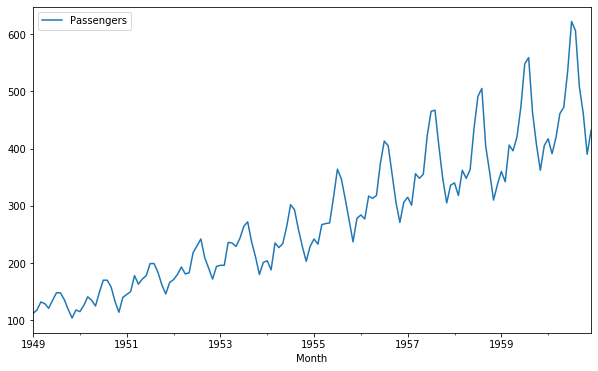

In [102]:
#Visualization
df.plot()

In [103]:
# from above grap, we can see graph is moving upwards and mean is also not constant, so data is not stationary

In [104]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [105]:
test_result=adfuller(df['Passengers'])

In [106]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [107]:
adfuller_test(df['Passengers'])

ADF Test Statistic : 0.8153688792060433
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [108]:
# so data is non stationary, so from here we have make data stationary, we will follow differencing the value with previous
#position, as it is seasional we will shift 12 means in one year.

In [109]:
df['Passengers'].shift(1)

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: Passengers, Length: 144, dtype: float64

In [110]:
#here we are considering seasonal so we need to take 12 months
df['Seasonal First Difference']=df['Passengers']-df['Passengers'].shift(12)

In [111]:
df['Seasonal First Difference']

Month
1949-01-01     NaN
1949-02-01     NaN
1949-03-01     NaN
1949-04-01     NaN
1949-05-01     NaN
              ... 
1960-08-01    47.0
1960-09-01    45.0
1960-10-01    54.0
1960-11-01    28.0
1960-12-01    27.0
Name: Seasonal First Difference, Length: 144, dtype: float64

In [112]:
df.head(24)

,Passengers,Seasonal First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


In [113]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.3830207264924814
p-value : 0.011551493085514952
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


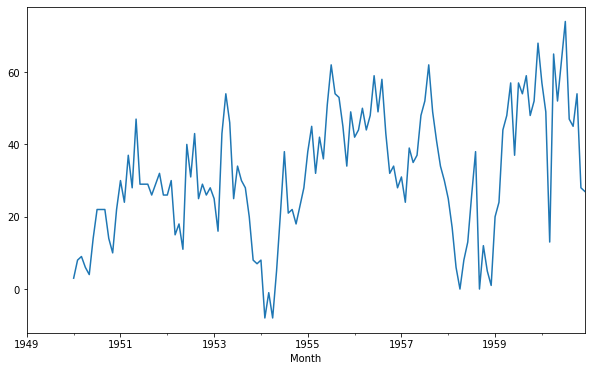

In [114]:
# so data looks stationary at this time
df['Seasonal First Difference'].plot()

In [115]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # through this we will find how much data needed from dataset for future prediction
import statsmodels.api as sm

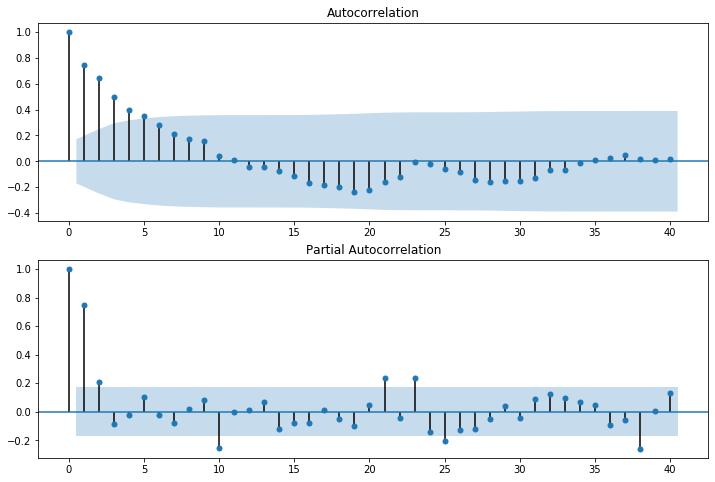

In [116]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1) # selected 13 beacuse first 12 is Nan or we can use dropna
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [117]:
# For non-seasonal data
#p=1, d=1, q=0 or 1, p is 1 because sudden decrease, we can see from graph, for q we can take 0/1 because no exponential decrease in graph
from statsmodels.tsa.arima_model import ARIMA
# we are selecting Arima when data is not seasonal but in this case data is seasional, so we will use Sarima, but here
#we have implemented this as well to see how it is implemented.

In [118]:
model=ARIMA(df['Passengers'],order=(2,1,2))
model_fit=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [119]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Sat, 02 Apr 2022   AIC                           1344.043
Time:                        16:30:52   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5312      0.708      3.574      0.000       1.143       3.919
ar.L1.D.Passengers     1.6477      0.033     49.934      0.000       1.583       1.712
ar.L2.D.Passengers    -0.9094      0.033    -27.881      0.000      -0.973      -0.845
ma.L1.D.Passengers    -1.9098      0.065    -29.502      0.000      -2.037      -1.783
ma.L2.D.Passengers     0.9997      0.068     14.802      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

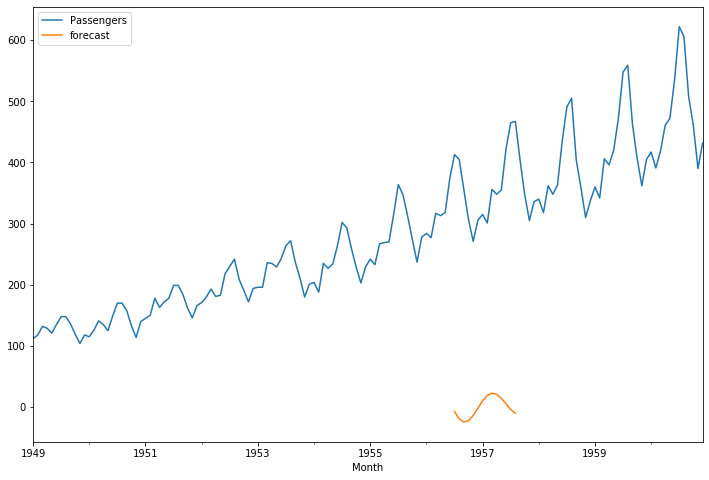

In [120]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [121]:
model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(2, 1, 2),seasonal_order=(2,1,2,12)) # used 12 because split is used as 12
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


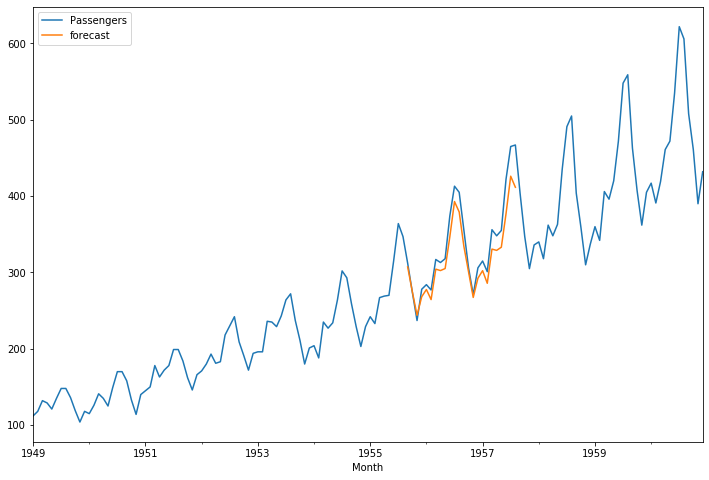

In [122]:
df['forecast']=results.predict(start=80,end=103,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))

In [131]:
df['forecast'].shape

(144,)

### above orange colour is predicted data, it is look like similar
# Facing problem to create future one, so below code need to fix

In [124]:

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

#here we are creating additinal dataset for 24 month 

In [125]:
future_dates
#df.columns


[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [126]:
future_dates[1:]

[Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [137]:
future_datest_df=pd.DataFrame(index=future_dates,columns=df.columns)


AttributeError: type object 'object' has no attribute 'dtype'

In [128]:
#future_datest_df.tail()

NameError: name 'future_datest_df' is not defined

In [133]:
df['forecast1']=results.predict(1,364)

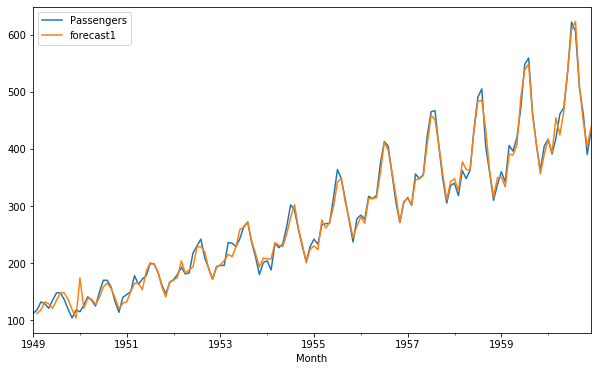

In [134]:
df[['Passengers','forecast1']].plot()